#### Prosper Loan Analysis - Data Visualization project
##### By Olugbenga Ajiga 03-01-2023

#### INTRODCUTION:

For this project, I conducted an Exploratory Data Analysis (EDA) on a dataset from Prosper, a marketplace lending platform in the US. The dataset contained information on 113,937 loans, including variables such as loan amount, interest rate, current loan status, borrower income, employment status, credit history, and payment information. The goal of the project was to understand the characteristics of variables that could impact loan status, and to identify any relationships between multiple variables, using summary statistics and data visualizations. This project was completed as part of the Udacity Data Analyst Nano Degree Program.

#### EDA-EXPLORATION:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sb
import warnings; warnings.simplefilter('ignore') ### keeping warning sign off

## Loading the data

In [2]:
prosper_loan = pd.read_csv('prosperLoanData.csv')
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper_loan.shape

(113937, 81)

113937 data entries

#### UNIVARIATE EXPLORATION:

In [4]:
# prosper_loan.info

In [5]:
prosper_loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
# main variable of interest (BorrowerRate)
#EmploymentStatus and IncomeRange to be converted to ordered categorical data type
prosper_loan_var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed',
                                              'Not available','Other','Part-time','Not employed','Retired'],
                         
                        'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+',
                                        '$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
                         
                        'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Cancelled'
                                       'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
                                       'Past Due (16-30 days)','FinalPaymentInProgress', 'Past Due (>120 days)']
                           }

for var in prosper_loan_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_loan_var_dict[var])
    prosper_loan[var] = prosper_loan[var].astype(ordered_var)

In [7]:
prosper_loan.LoanStatus.value_counts()

Current                           56576
Completed                         38074
Chargedoff                        11992
Defaulted                          5018
Past Due (1-15 days)                806
Past Due (61-90 days)               313
Past Due (91-120 days)              304
Past Due (16-30 days)               265
FinalPaymentInProgress              205
Past Due (>120 days)                 16
CancelledPast Due (31-60 days)        0
Name: LoanStatus, dtype: int64

### Employment status of borrowers and its impact on loan approval through Prosper
The employment status of the borrower refers to their job situation at the time they applied for a loan through Prosper. It seems that it is uncommon for Prosper to approve loans for unemployed individuals, based on the data shown in the plot.

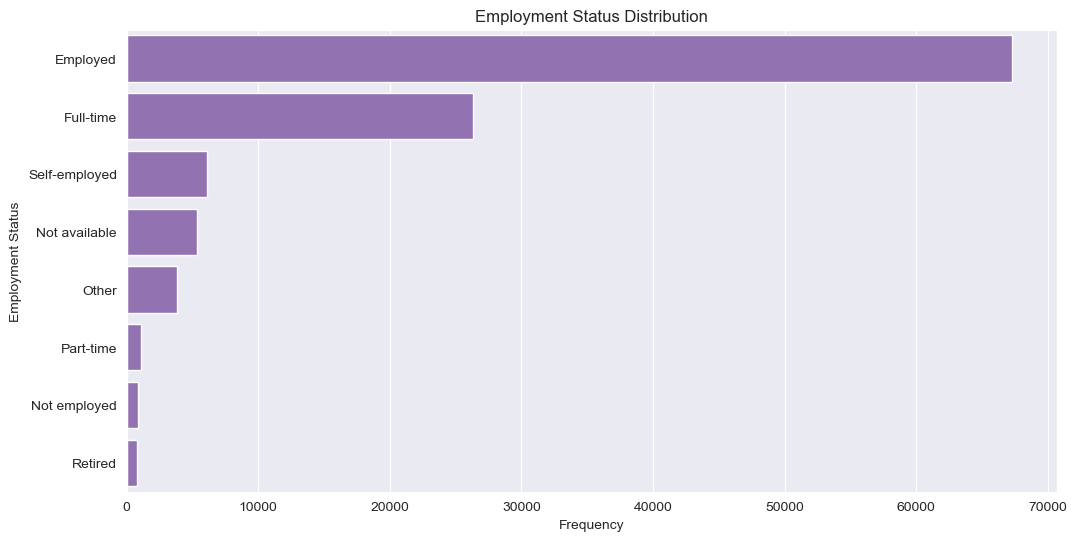

In [8]:
# textprops = {"fontsize":16}
# sorted_verify = pd.DataFrame(prosper_loan['IncomeVerifiable'].value_counts().reset_index())
# labels = sorted_verify['index']

# plt.pie(data = sorted_verify, x='IncomeVerifiable', labels = None, startangle = 90,
#         counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%', textprops =textprops);
# plt.axis('square');
# plt.title('Verifiable Income Distribution')
# plt.legend(labels);

sb.set_style('darkgrid')
color_1 = sb.color_palette()[4]
plt.figure(figsize=[12, 6]);
sb.countplot(y = 'EmploymentStatus', color = color_1, data = prosper_loan);
plt.title('Employment Status Distribution');
plt.xlabel('Frequency');
plt.ylabel('Employment Status');

#### INCOME RANGE AND LOAN APPROVAL BY PROSPER
The income range of borrowers at the time of loan application is shown in the plot, with the majority falling between $25,000 and $75,000. However, this plot does not show any correlation between income level and loan approval by Prosper. It simply reflects the distribution of income among those who were able to obtain a loan from Prosper.

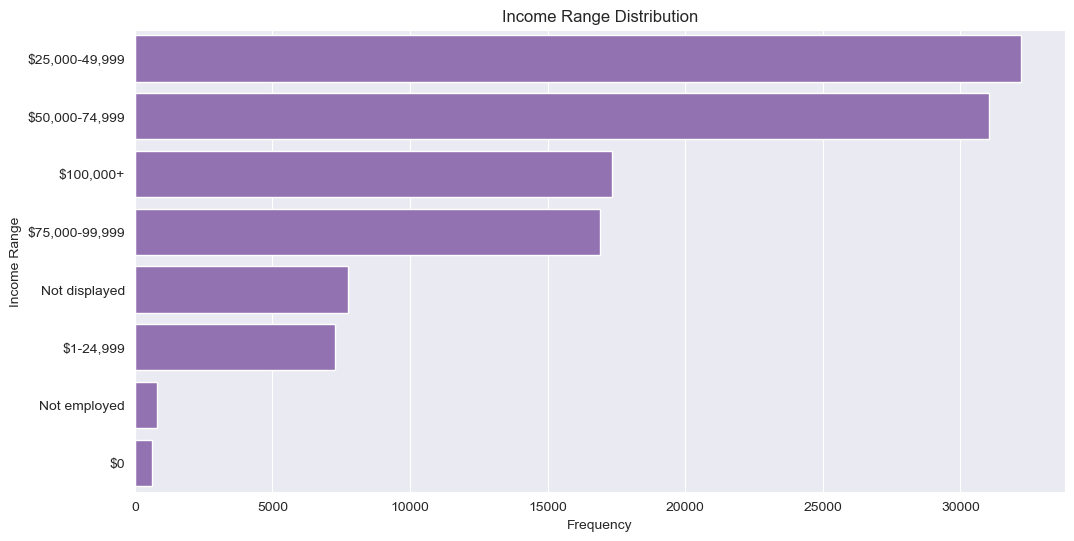

In [9]:
plt.figure(figsize=[12, 6]);
sb.countplot(y = 'IncomeRange', color = color_1, data = prosper_loan);
plt.title('Income Range Distribution');
plt.xlabel('Frequency');
plt.ylabel('Income Range');
# plt.xticks(rotation=25);

#### LOAN STATUS OPTIONS AND FREQUENCY AMONG PROSPER BORROWERS
The loan status of people who have a loan from Prosper can be one of several options: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, or PastDue (which may also have a delinquency bucket associated with it). The data shows that a significant number of individuals have completed their loans with Prosper, while the number of past due or cancelled loans is relatively low

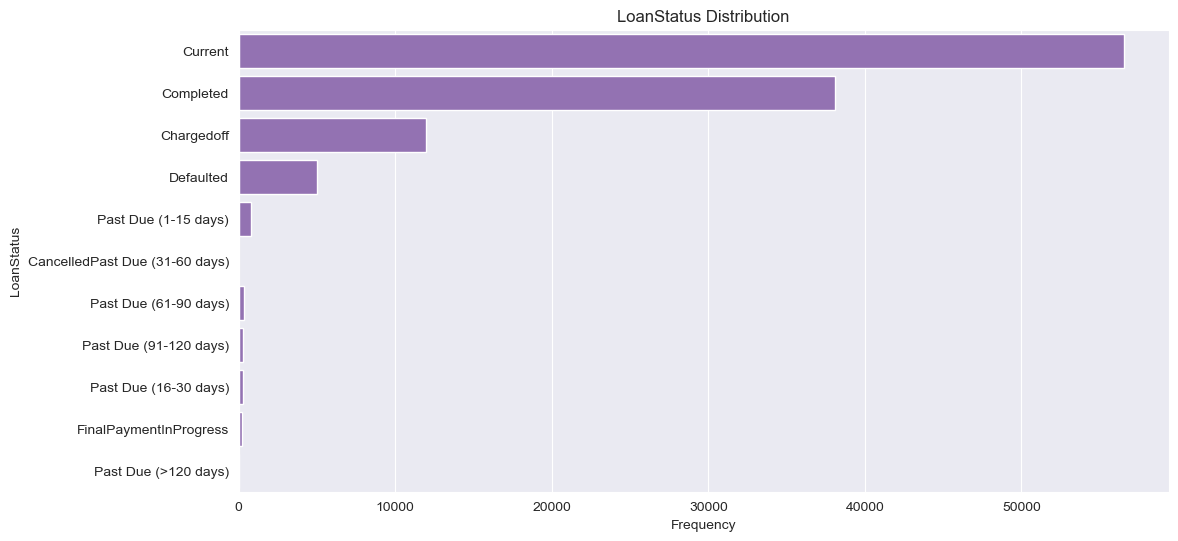

In [10]:
plt.figure(figsize=[12, 6]);
sb.countplot(y = 'LoanStatus', color = color_1, data = prosper_loan);
plt.title('LoanStatus Distribution');
plt.xlabel('Frequency');
plt.ylabel('LoanStatus');

#### THE PROSPER SCORE AND ITS USE IN EVALUATING LOAN RISK
The Prosper Score is a tool used to evaluate the risk level of a loan based on historical data from Prosper. It ranges from 1 to 10, with a score of 10 being the lowest risk. This score is only applicable for loans issued after July 2009. The distribution of Prosper scores among individuals with loans appears to be fairly evenly distributed, with the majority of scores ranging from 3 to 9. The most common scores are 4, 6, and 8.The Prosper Score is a tool used to evaluate the risk level of a loan based on historical data from Prosper. It ranges from 1 to 10, with a score of 10 being the lowest risk. This score is only applicable for loans issued after July 2009. The distribution of Prosper scores among individuals with loans appears to be fairly evenly distributed, with the majority of scores ranging from 3 to 9. The most common scores are 4, 6, and 8.


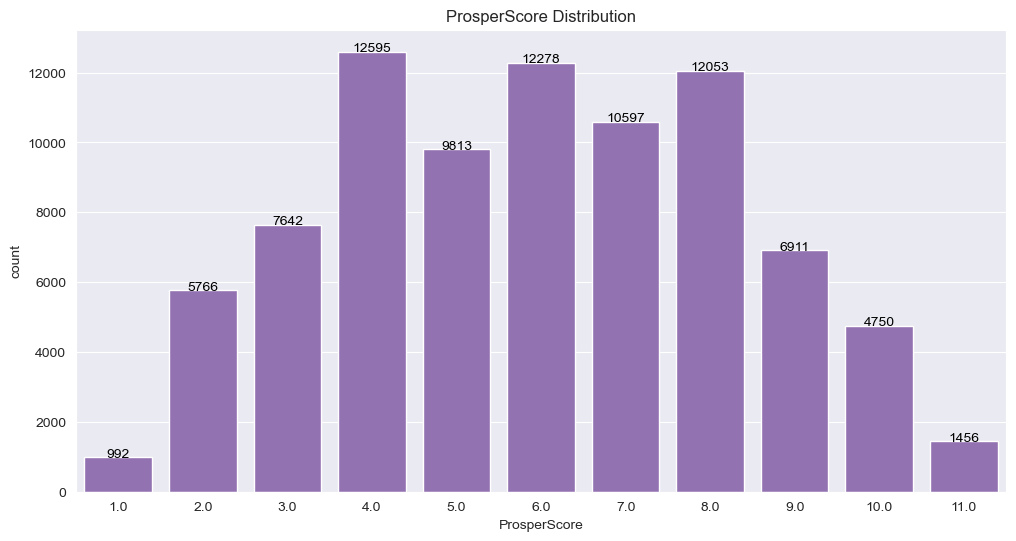

In [11]:
plt.figure(figsize=[12, 6]);
sb.countplot(x = 'ProsperScore', color = color_1, data = prosper_loan);
plt.title('ProsperScore Distribution');

locs, labels = plt.xticks()
cat_counts = prosper_loan['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

#### THE APR FOR THE LOAN AND ITS DISTRIBUTION IN A PLOT
The APR, or Annual Percentage Rate, for the loan is the percentage rate at which the borrower must pay back the loan on an annual basis. The APR for this loan can be seen in the plot, which shows two peaks at around 0.2 and 0.35. The peak at 0.35 is the highest of the two. Overall, the plot appears to be evenly distributed, rather than heavily skewed towards any particular APR rate.The APR, or Annual Percentage Rate, for the loan is the percentage rate at which the borrower must pay back the loan on an annual basis. The APR for this loan can be seen in the plot, which shows two peaks at around 0.2 and 0.35. The peak at 0.35 is the highest of the two. Overall, the plot appears to be evenly distributed, rather than heavily skewed towards any particular APR rate.

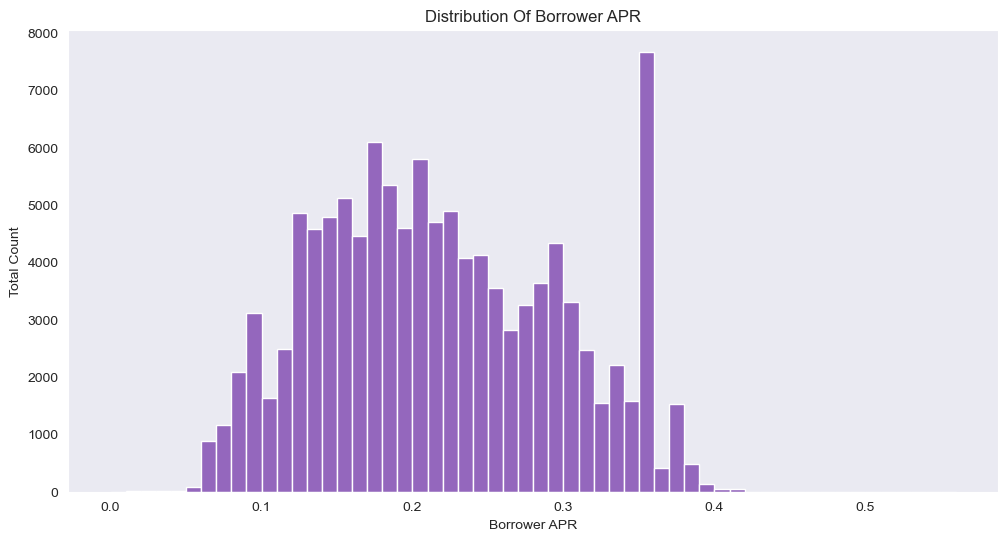

In [12]:
rcParams['figure.figsize'] = 12, 6
bins_size = np.arange(0, prosper_loan.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(x = 'BorrowerAPR', bins = bins_size, color = color_1, data = prosper_loan)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR')
plt.grid(False);

#### THE IMPACT OF INTEREST RATES ON BORROWERS WITH LOANS:
The interest rate for this loan for the borrower.
What is the annual percentage rate for the borrower with a loan?
The plot closely resembles that of BorrowerAPR, but slightly shifted to the left. The highest point is approximately 0.15, with another peak slightly above 0.3, which is the highest peak.

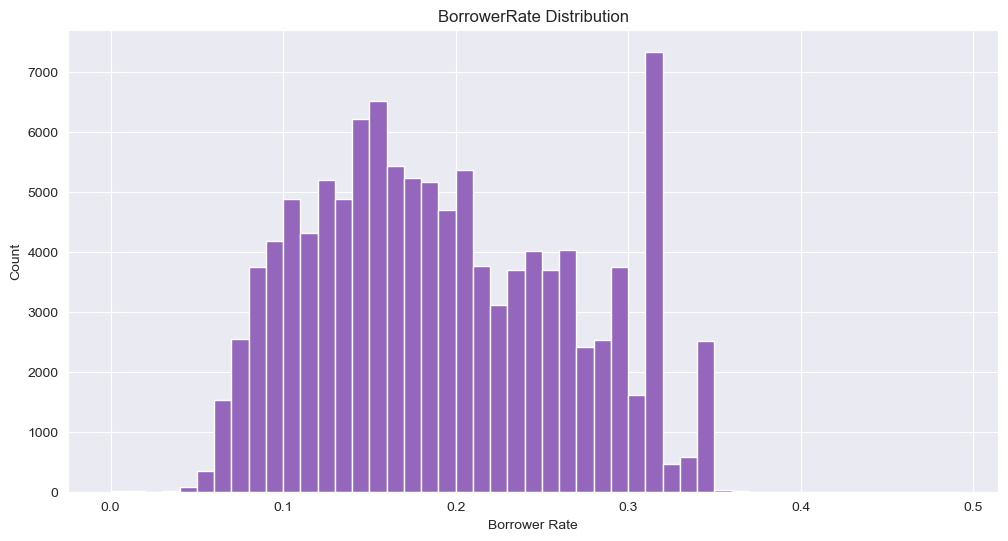

In [13]:
plt.figure(figsize=[12, 6]);
bins_size = np.arange(0,prosper_loan['BorrowerRate'].value_counts().index.max(),0.01)
plt.hist(x = 'BorrowerRate', bins = bins_size, color = color_1, data = prosper_loan);

plt.title('BorrowerRate Distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

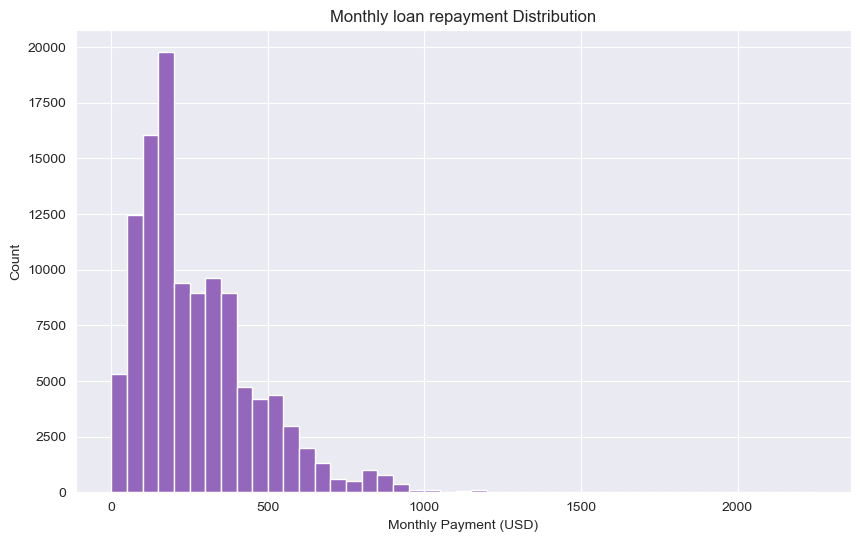

In [14]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

plt.figure(figsize=[10, 6]);
bins_size = np.arange(0,prosper_loan['MonthlyLoanPayment'].value_counts().index.max(),50)
plt.hist(x = 'MonthlyLoanPayment', bins = bins_size, color=color_1, data = prosper_loan);

plt.title('Monthly loan repayment Distribution');
plt.xlabel('Monthly Payment (USD)');
plt.ylabel('Count');

#### OCCUPATIONAL ANALYSIS OF BORROWERS ON PROSPER P2P LENDING PLATFORM
The borrower's chosen occupation at the time of creating their listing is analyzed. Excluding "Other" and "Professional" categories, we observe that computer programmer, executive, and administrative assistant are the most frequent occupations among borrowers

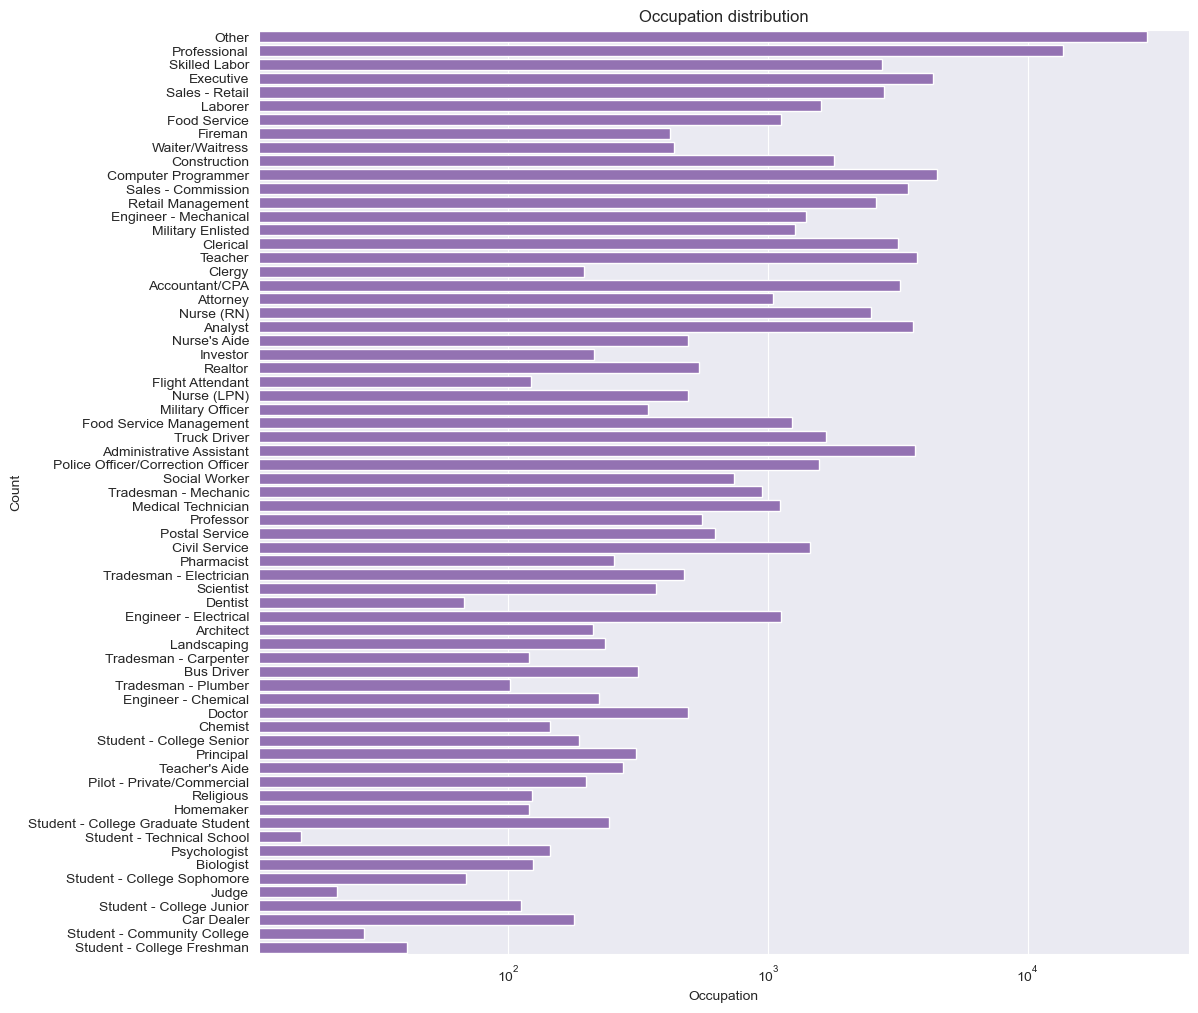

In [15]:
plt.figure(figsize=[12,12]);
sb.countplot(y = 'Occupation', color = color_1, data = prosper_loan );
plt.title('Occupation distribution');
plt.ylabel('Count');
plt.xlabel('Occupation');
plt.xscale('log');

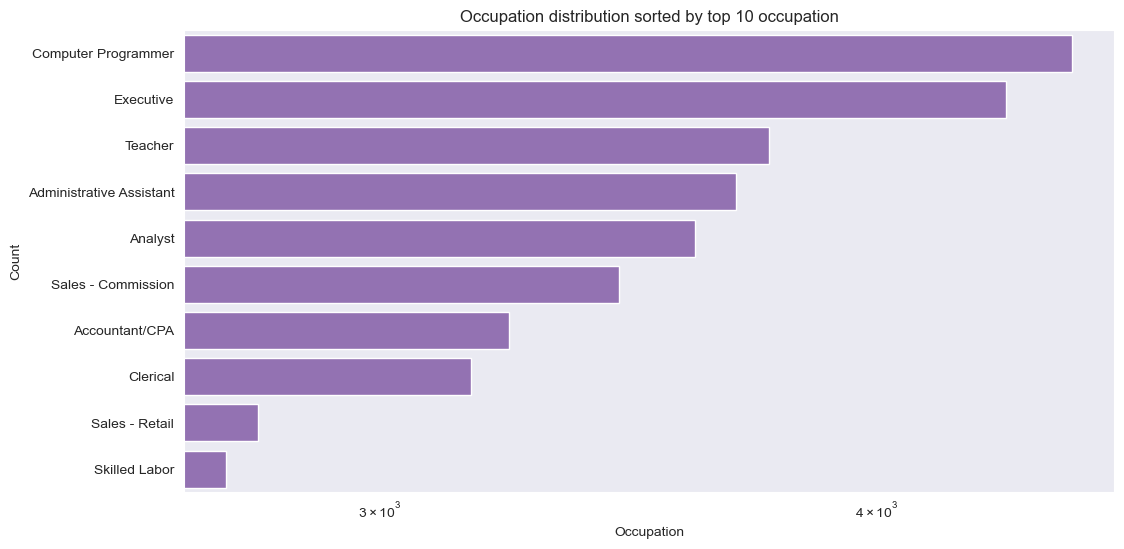

In [16]:
plt.figure(figsize=[12, 6]);
top_ten_occupation = ['Computer Programmer','Executive','Teacher','Administrative Assistant','Analyst','Sales - Commission','Accountant/CPA','Clerical','Sales - Retail','Skilled Labor']
occupation_sub = prosper_loan.loc[prosper_loan['Occupation'].isin(top_ten_occupation)]

sb.countplot(data = occupation_sub, y = 'Occupation', color = color_1, order = occupation_sub['Occupation'].value_counts().index);
plt.title('Occupation distribution sorted by top 10 occupation');
plt.ylabel('Count');
plt.xlabel('Occupation');
plt.xscale('log');

#### BIVARIATE EXPLORATION

I am examining the connection between a borrower's rate and their employment status and income range. It appears that Prosper takes these factors into consideration when determining the rate for a borrower. The data shows that borrowers who are unemployed tend to have higher rates, while those with higher income ranges tend to have lower rates. However, it is not necessarily the case that employed borrowers always have lower rates. There is a slight trend indicating that the higher the income range, the lower the median rate. Overall, it appears that income range plays a role in the rate a borrower receives.We are examining the connection between a borrower's rate and their employment status and income range. It appears that Prosper takes these factors into consideration when determining the rate for a borrower. The data shows that borrowers who are unemployed tend to have higher rates, while those with higher income ranges tend to have lower rates. However, it is not necessarily the case that employed borrowers always have lower rates. There is a slight trend indicating that the higher the income range, the lower the median rate. Overall, it appears that income range plays a role in the rate a borrower receives.

#### NUMERIC VARIABLES OBSERVATION

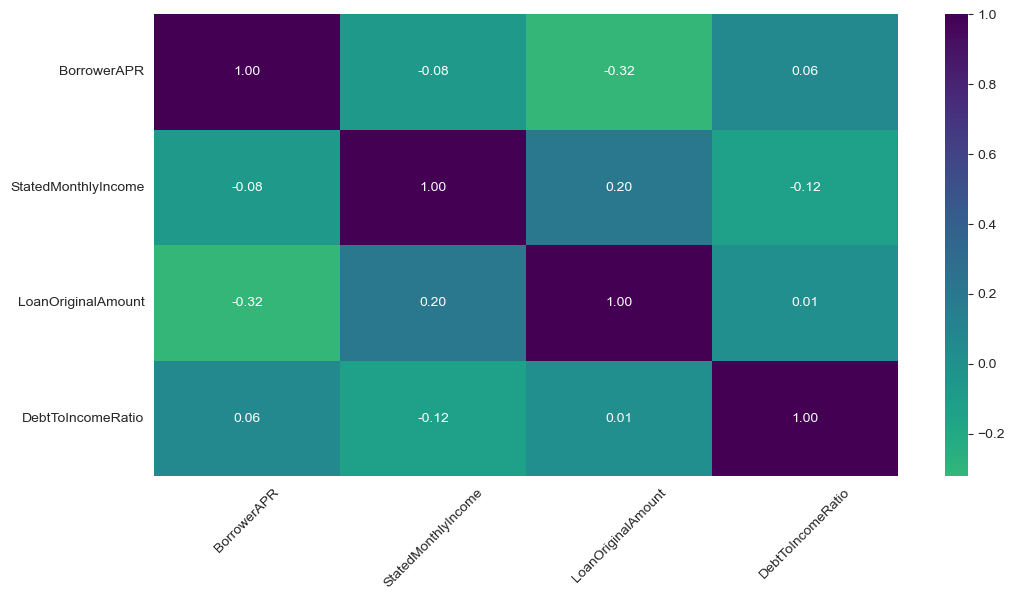

In [17]:
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)']

sb.heatmap(prosper_loan[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation=45);

In [18]:
# g = sb.PairGrid(x_vars =['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio'],
#                y_vars = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)'],
#                data = prosper_loan)

# g.map(sb.boxplot, color = color_1)
# g.fig.set_size_inches(12,8); 

### bivariate plots of total loan amount vs employment status and income range

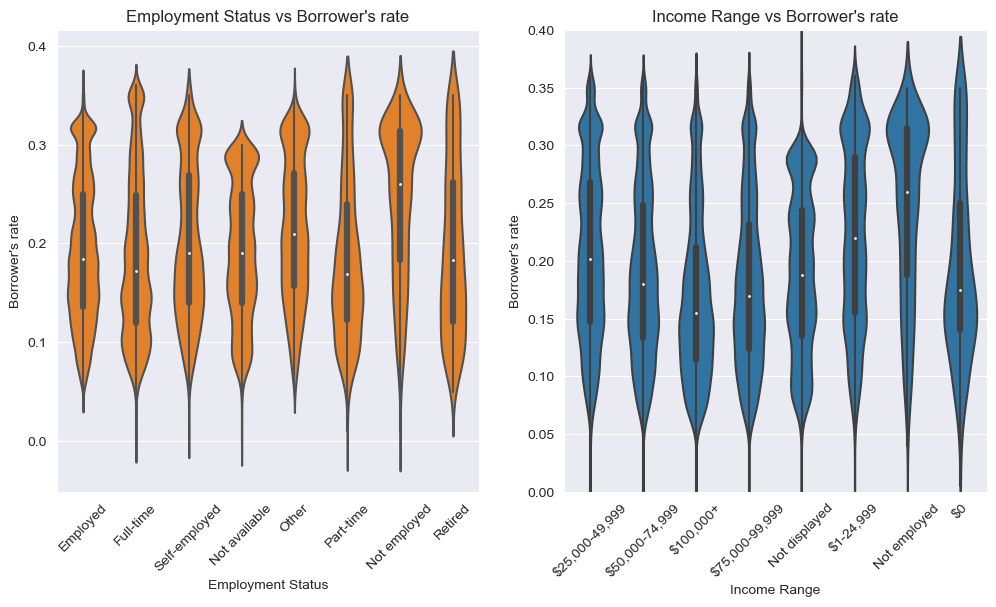

In [19]:
# bivariate plots of total loan amount vs employment status and income range
plt.figure(figsize=[12, 6]);
color1 = sb.color_palette()[1]

plt.subplot(1,2,1)
sb.violinplot(x = 'EmploymentStatus', y = 'BorrowerRate', color=color1, data = prosper_loan);
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

color_0 = sb.color_palette()[0]
plt.subplot(1,2,2)
sb.violinplot(x = 'IncomeRange', y = 'BorrowerRate', color=color_0, data = prosper_loan);
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

#### THE IMPACT OF OCCUPATION ON LOAN INTEREST RATES
Is a borrower's occupation related to their loan interest rate? The data suggests that certain occupations, such as clerical workers, nurse's aides, bus drivers, and teacher's aides, may have higher median interest rates compared to other occupations.Is a borrower's occupation related to their loan interest rate? The data suggests that certain occupations, such as clerical workers, nurse's aides, bus drivers, and teacher's aides, may have higher median interest rates compared to other occupations.

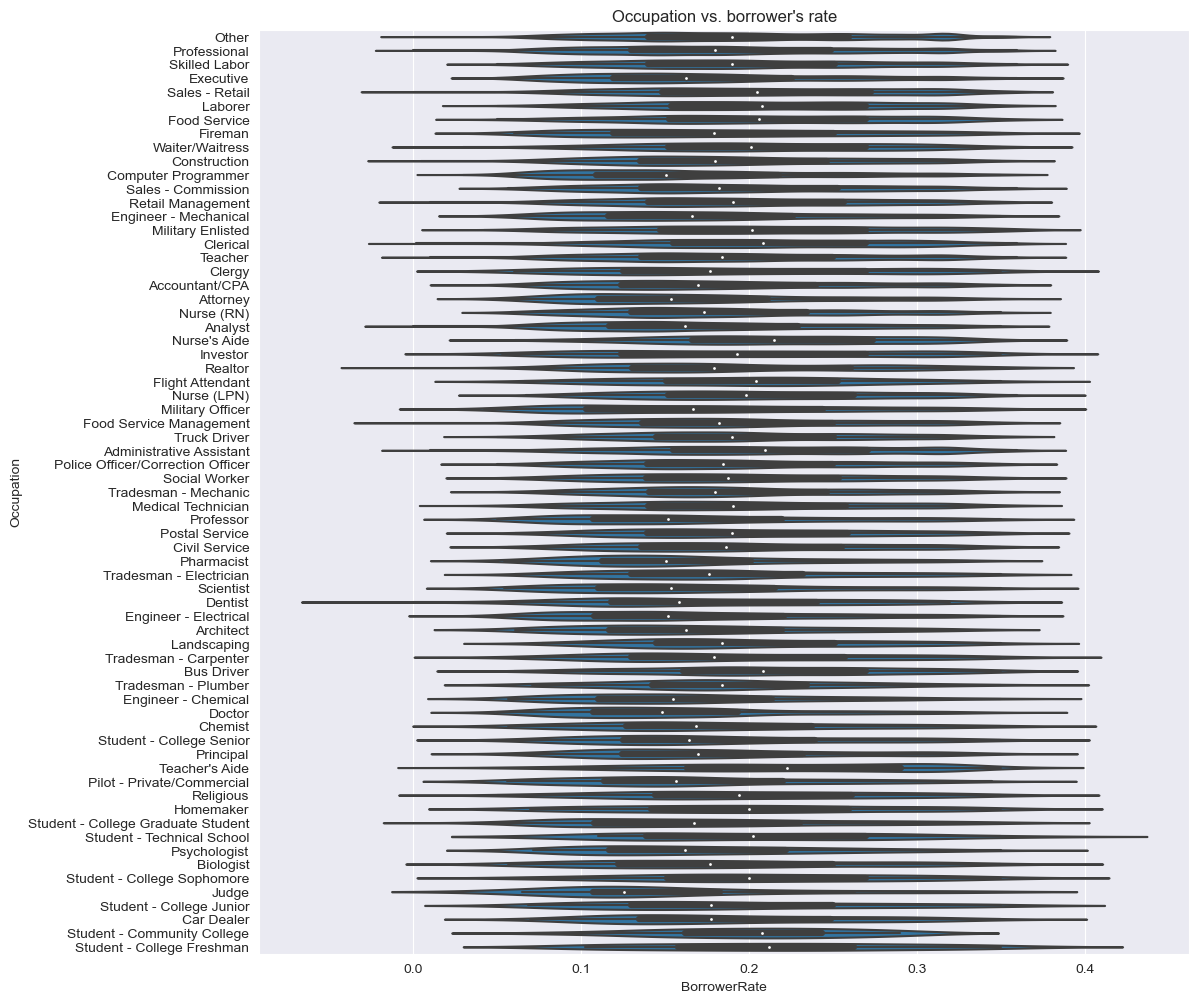

In [20]:
color = sb.color_palette()[0]
plt.figure(figsize=[12, 12]);
sb.violinplot(x = 'BorrowerRate', y = 'Occupation', color=color, data = prosper_loan);
plt.title('Occupation vs. borrower\'s rate');

This will be a top 10 Occupation from the previous graph -
We notice here that administrative Assistant and clerical have the higher median rate, while analyst have lower median rate.

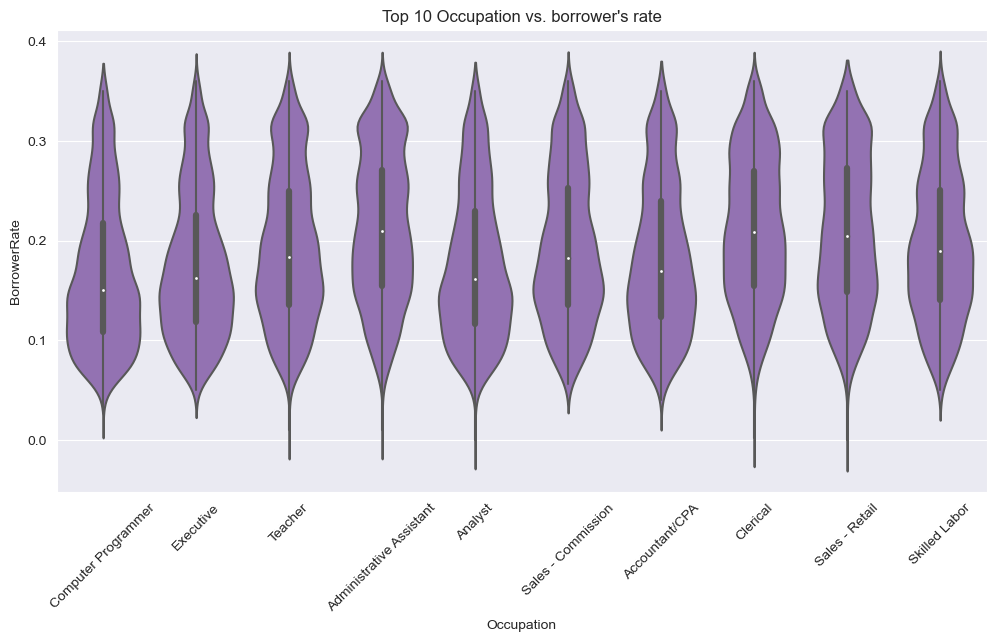

In [21]:
plt.figure(figsize=[12, 6]);
top_ten_occupation = ['Computer Programmer','Executive','Teacher', 'Administrative Assistant',
                      'Analyst','Sales - Commission','Accountant/CPA','Clerical','Sales - Retail','Skilled Labor']
occupation_sub = prosper_loan.loc[prosper_loan['Occupation'].isin(top_ten_occupation)]

sb.violinplot(x = 'Occupation', y = 'BorrowerRate', color=color_1, 
              order = occupation_sub['Occupation'].value_counts().index, data = prosper_loan);
plt.xticks(rotation = '90');
plt.title('Top 10 Occupation vs. borrower\'s rate');
plt.xticks(rotation=45);

#### THE IMPACT OF OCCUPATION ON MONTHLY LOAN PAYMENTS

Is the size of a monthly loan payment affected by one's occupation? The data suggests that there is little variance between occupations, although doctors and attorneys tend to have slightly higher median payments. This aligns with the common understanding that these occupations tend to have higher salaries.Is the size of a monthly loan payment affected by one's occupation? The data suggests that there is little variance between occupations, although doctors and attorneys tend to have slightly higher median payments. This aligns with the common understanding that these occupations tend to have higher salaries.

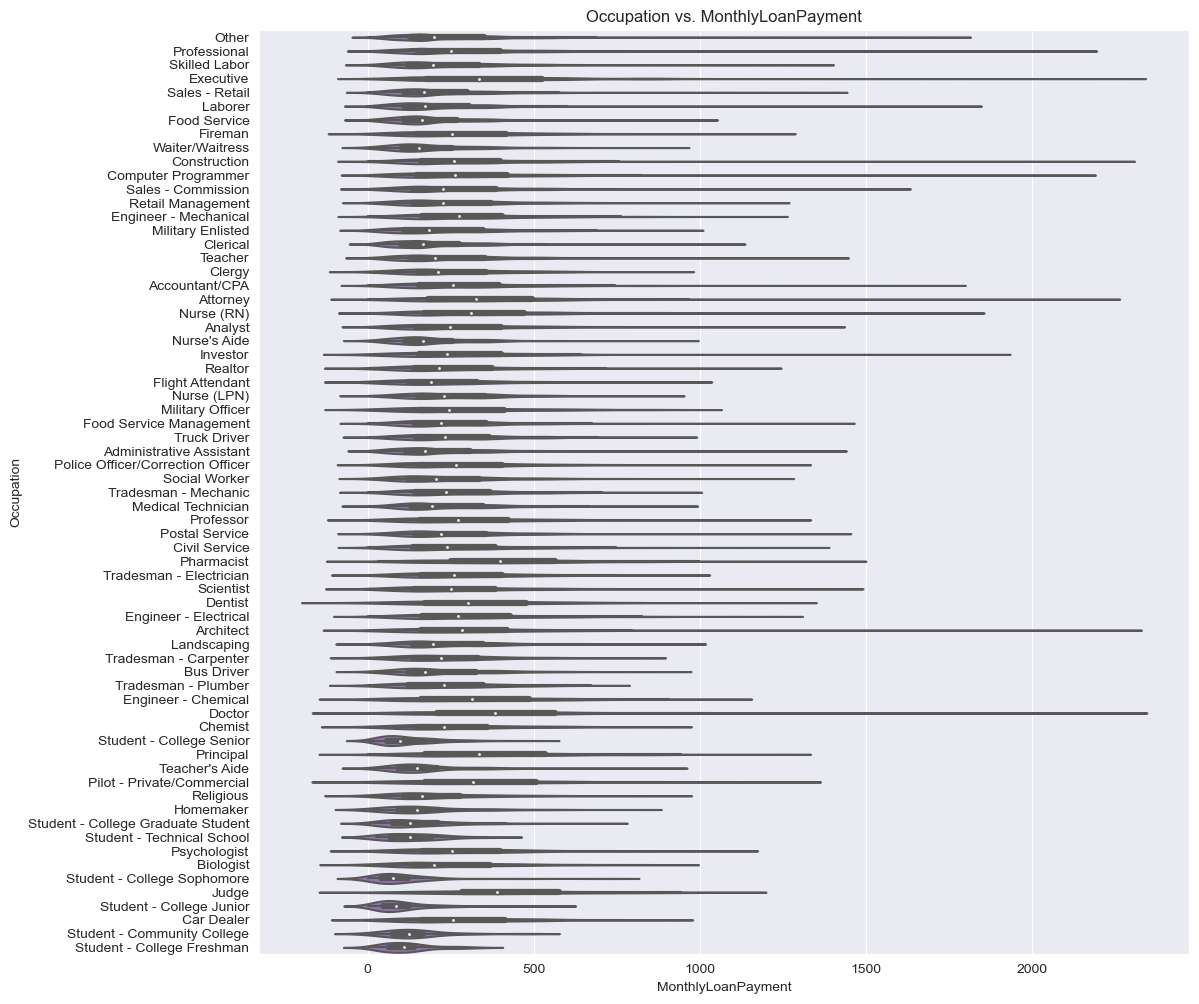

In [22]:
plt.figure(figsize=[12, 12]);
sb.violinplot(y = 'Occupation', x = 'MonthlyLoanPayment', color=color_1, data = prosper_loan);
plt.title('Occupation vs. MonthlyLoanPayment');

#### TOP 10 OCCUPATION FROM THE ABOVE GRAPH

This graph is not particularly informative, except that it shows that executives have the highest median monthly payment among the occupations depicted. 

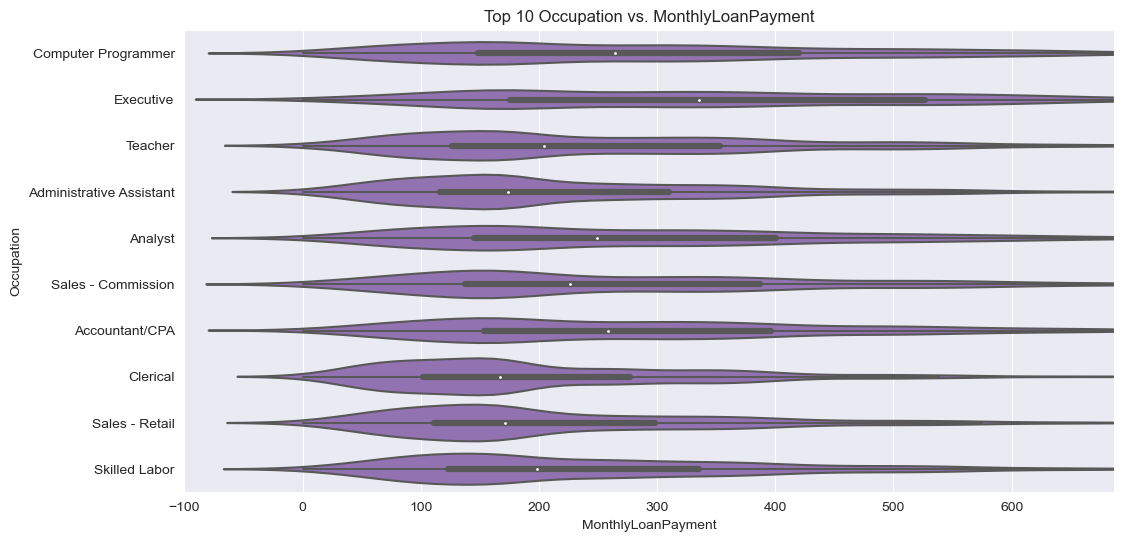

In [23]:
plt.figure(figsize=[12, 6]);
sb.violinplot(y = 'Occupation', x = 'MonthlyLoanPayment', color=color_1,
              order = occupation_sub['Occupation'].value_counts().index, data= prosper_loan);
plt.xlim(-100,occupation_sub.MonthlyLoanPayment.value_counts().max() + 1, 500)
plt.title('Top 10 Occupation vs. MonthlyLoanPayment');

#### THE FLUCTUATION OF BORROWER INTEREST RATES ON PROSPER FROM 2008-2014
Borrower rates saw a trend of increase from 2008 to 2011, followed by a steady decrease until 2014.

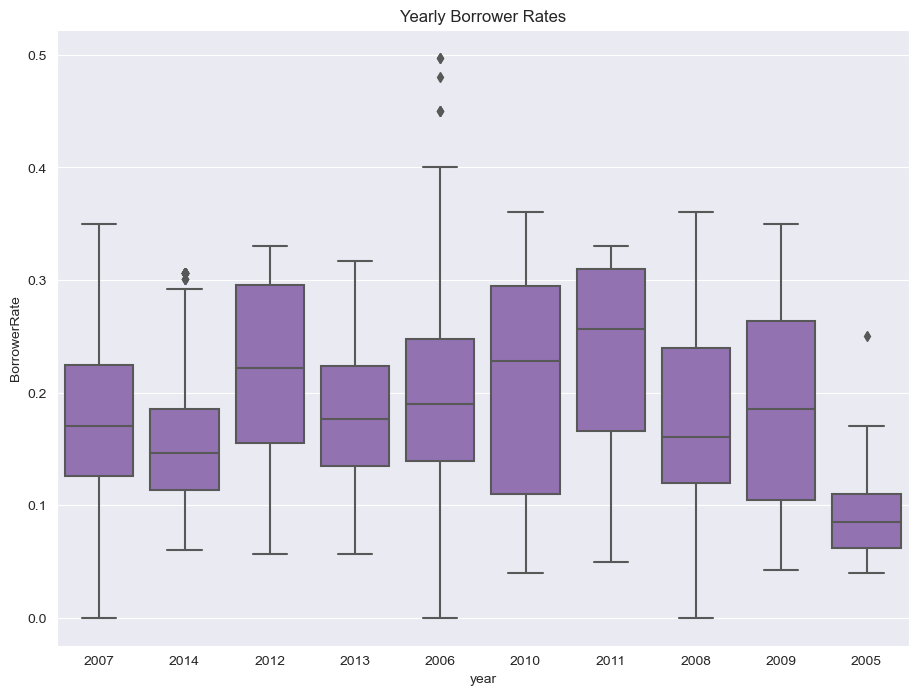

In [24]:
prosper_loan['year'] = prosper_loan['ListingCreationDate'].astype(str).str[:4]
plt.figure(figsize=[11, 8]);
color_2 = sb.color_palette()[4];
sb.boxplot(x = 'year', y = 'BorrowerRate', color = color_2, data = prosper_loan);
plt.title('Yearly Borrower Rates');

#### BORROWER RATES VS. PROSPERSCORE

Does the ProsperScore impact the rate?
This plot suggests that the ProsperScore is a significant factor in determining the borrower's rate. It appears that a higher score is associated with a lower rate."

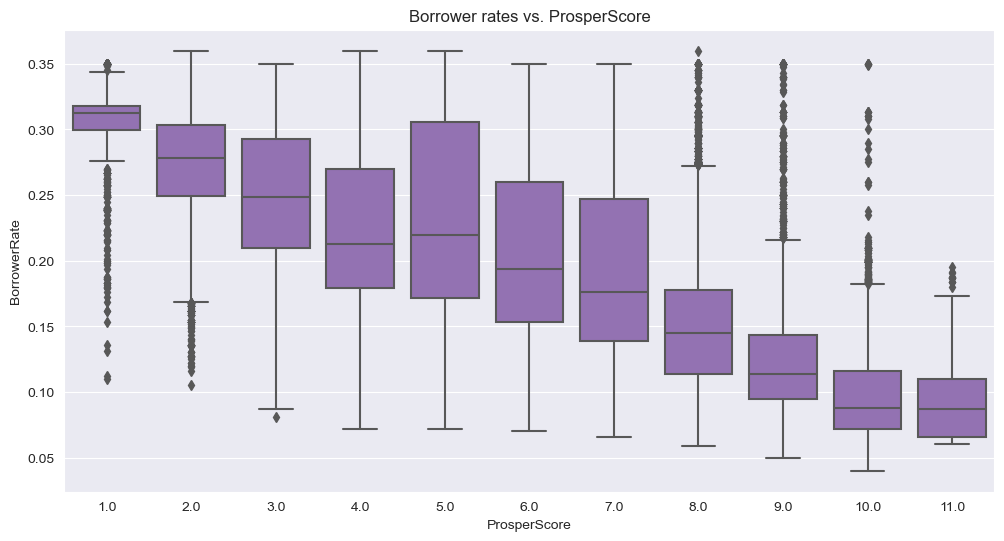

In [25]:
plt.figure(figsize=[12, 6]);
color_2 = sb.color_palette()[4];
sb.boxplot(x = 'ProsperScore', y = 'BorrowerRate', color = color_2, data = prosper_loan);
plt.title('Borrower rates vs. ProsperScore');

#### MULTIVARIATE EXPLORATION

#### YEARLY BORROWER RATE VS. ISHOMEOWNER
Is being a homeowner a factor in the yearly borrower rate on Prosper? The data suggests that homeowners may have a slightly lower interest rate compared to non-homeowners.

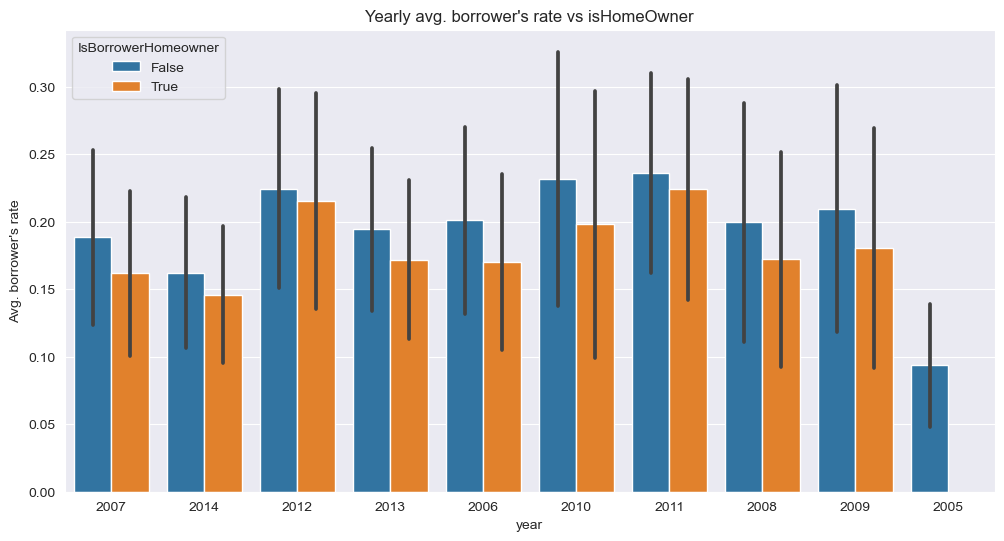

In [26]:
plt.figure(figsize=[12, 6]);
sb.barplot(x = 'year', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd', data = prosper_loan);
plt.ylabel('Avg. borrower\'s rate');
plt.title('Yearly avg. borrower\'s rate vs isHomeOwner');

#### YEAR BORROWER'S RATE VS. PROSPERSCORE VS. ISHOMEOWNER

Is the prosperScore and homeownership status of a borrower related to the interest rate they receive? The data seems to indicate that for individuals with a prosperScore of 5 or higher, homeowners tend to receive a lower interest rate. However, those with a prosperScore below 5 tend to have similar or higher interest rates regardless of whether they own a home or not.Is the prosperScore and homeownership status of a borrower related to the interest rate they receive? The data seems to indicate that for individuals with a prosperScore of 5 or higher, homeowners tend to receive a lower interest rate. However, those with a prosperScore below 5 tend to have similar or higher interest rates regardless of whether they own a home or not.

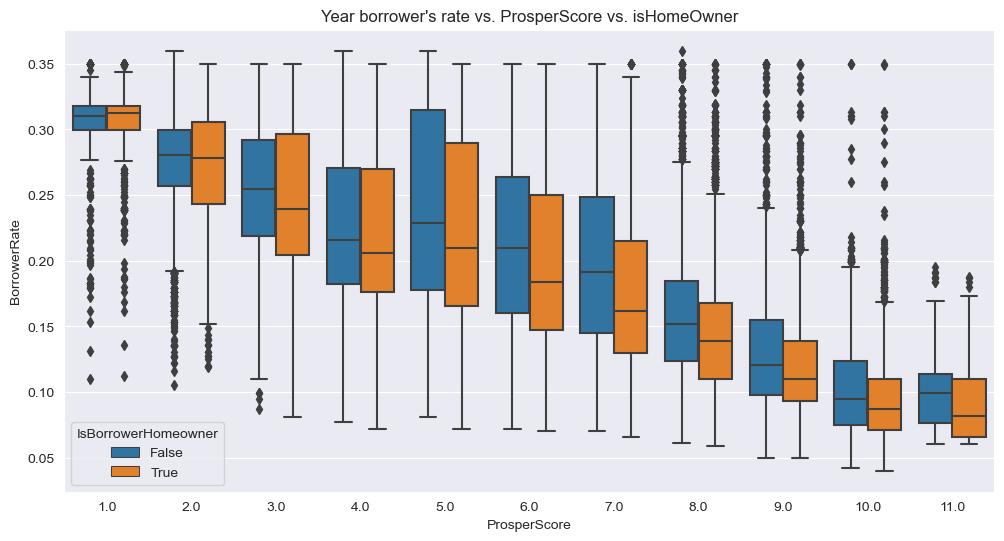

In [27]:
plt.figure(figsize=[12, 6]);
sb.boxplot(x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', data = prosper_loan);
plt.title('Year borrower\'s rate vs. ProsperScore vs. isHomeOwner');

#### YEAR BORROWER'S RATE VS. PROSPERSCORE VS. INCOMERANGE

Is there a connection between income level, borrower interest rates, and Prosper Scores? According to the data, those with higher incomes tend to have lower interest rates, while those who are unemployed often have higher rates compared to those with employment

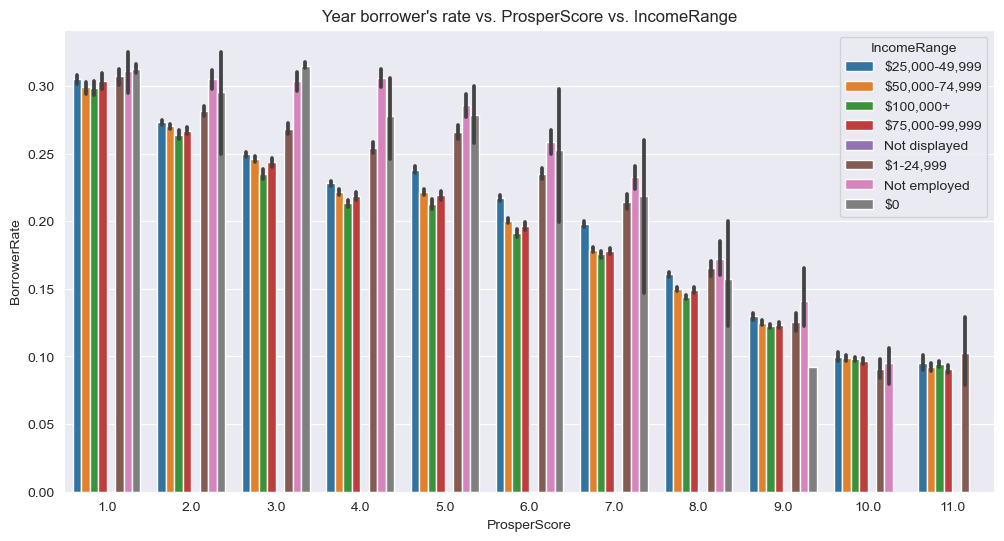

In [28]:
plt.figure(figsize=[12, 6]);
sb.barplot(data = prosper_loan, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. IncomeRange');

#### SIMPLIFYING THE RELATIONSHIP BETWEEN BORROWER'S RATE, PROSPERSCORE, AND INCOME RANGE THROUGH GRAPHS
This graph presents a simplified version of the previous graph displaying the relationship between borrower's rate, ProsperScore, and income range. It presents the same information as the previous graph but is more concise and easier to understandThis graph presents a simplified version of the previous graph displaying the relationship between borrower's rate, ProsperScore, and income range. It presents the same information as the previous graph but is more concise and easier to understand.

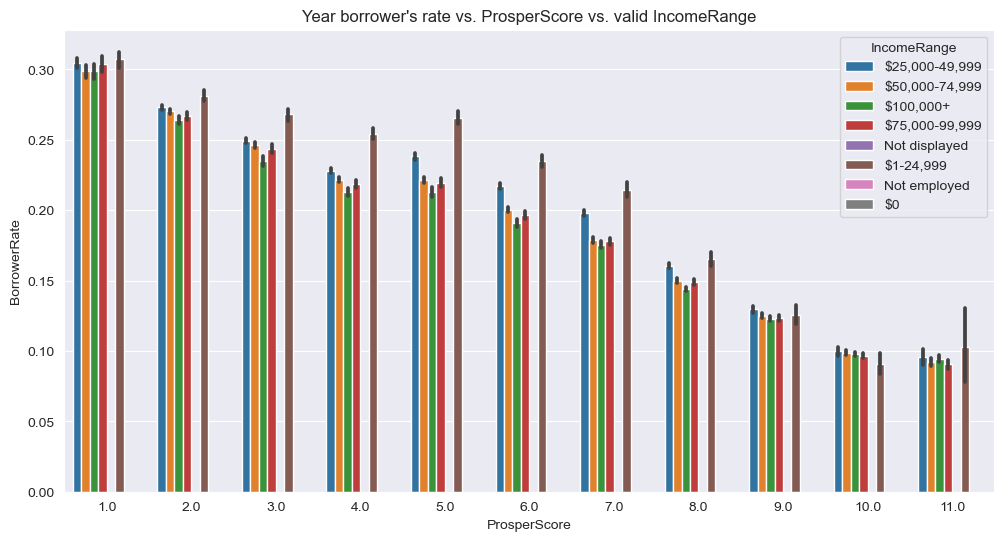

In [29]:
plt.figure(figsize=[12, 6]);
income_range_valid = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','$1-24,999']
income_range_sub = prosper_loan.loc[prosper_loan['IncomeRange'].isin(income_range_valid)]

sb.barplot(data = income_range_sub, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. valid IncomeRange');